In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols= ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('/content/drive/MyDrive/new ML-DL/magic04.data',names=cols)

In [3]:
df['class']= (df['class'] == 'g').astype(int)


In [4]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


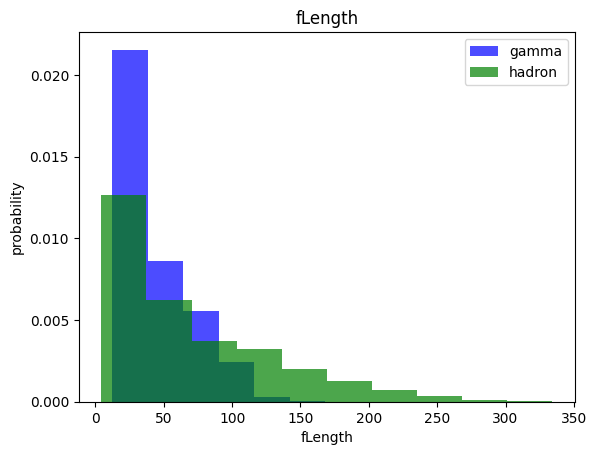

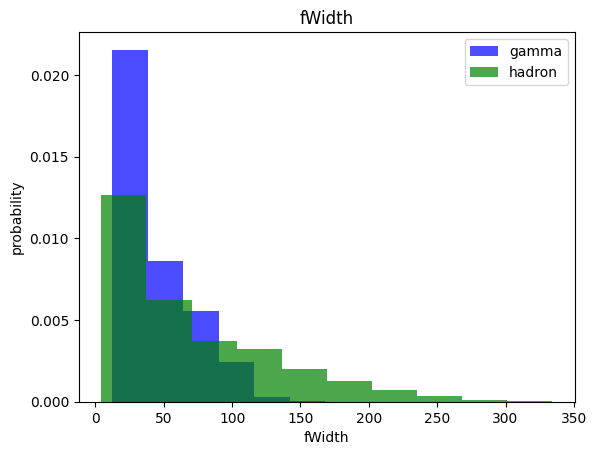

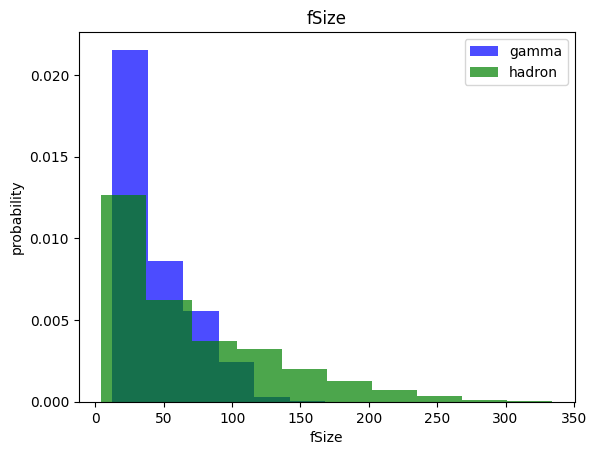

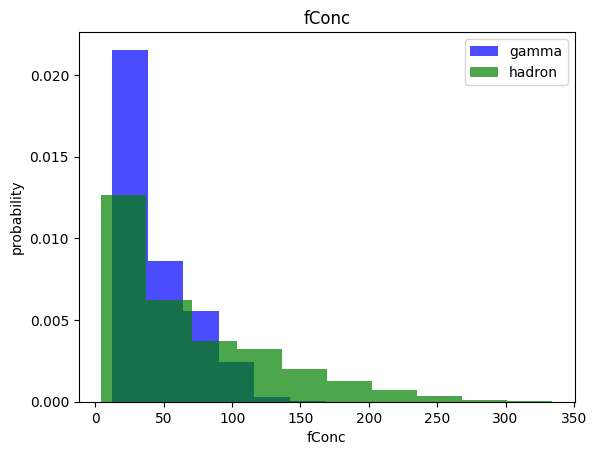

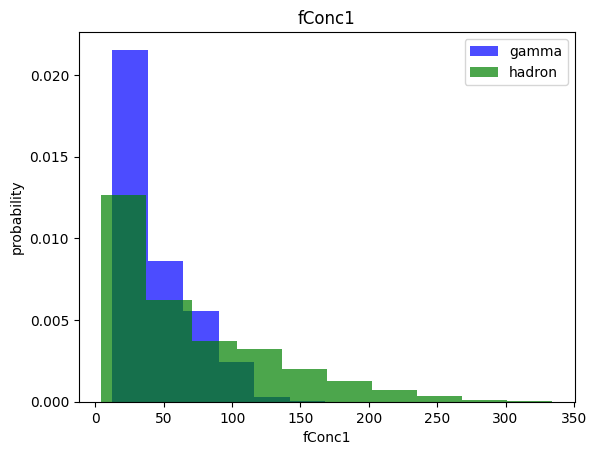

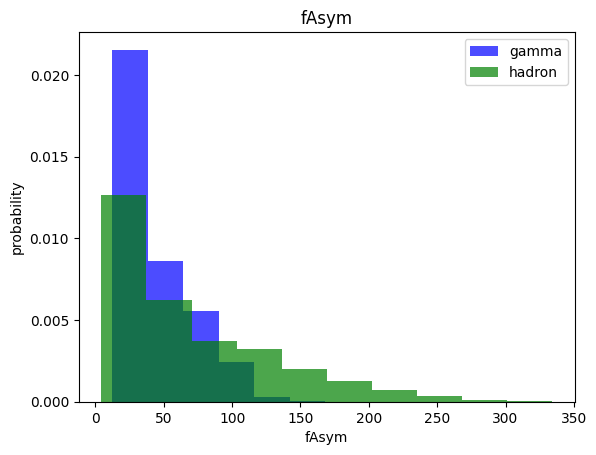

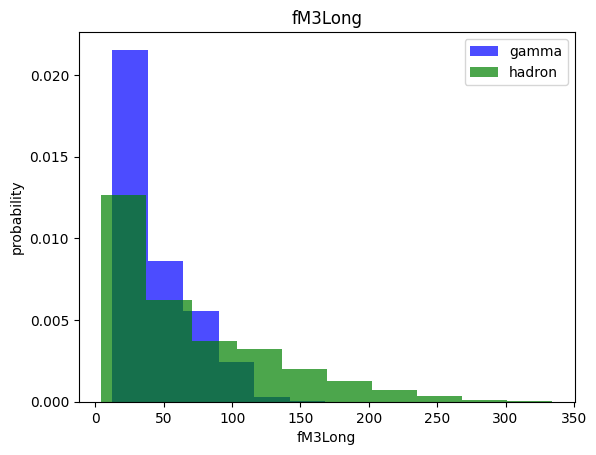

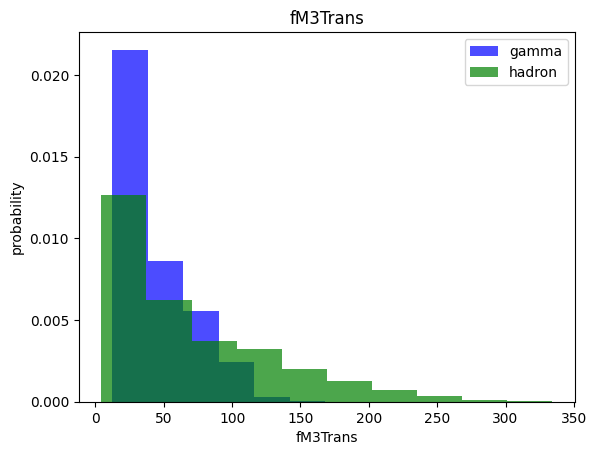

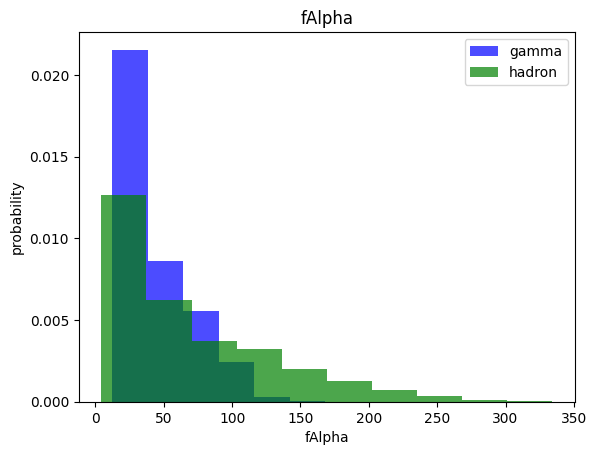

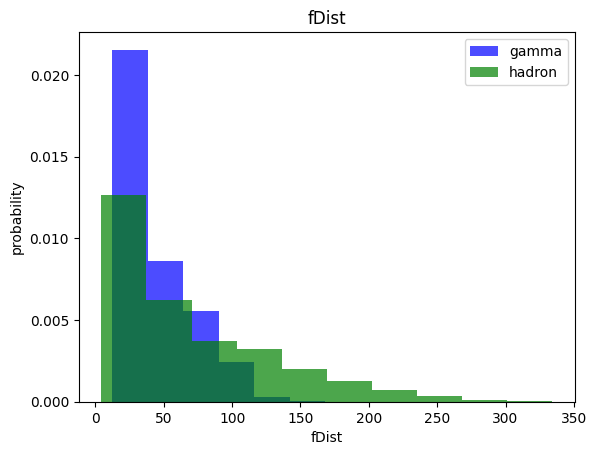

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1]['fLength'], color='blue', label='gamma',alpha=0.7, density=True)
  plt.hist(df[df['class']==0]['fLength'], color='green', label='hadron',alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validate and Test dataset

In [6]:
train, valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])
# frac mean return 100% of the data set after shuffeling

train

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
2788,53.8685,15.8310,2.8722,0.2859,0.1443,0.0619,36.8694,15.7186,32.4430,185.3960,1
8343,18.5143,15.6550,2.3253,0.5248,0.3002,6.4237,-16.6093,-10.8866,86.0763,211.1610,1
5595,29.9126,15.0223,2.7135,0.4603,0.2369,-6.6009,15.2915,-16.9716,2.5305,202.7920,1
794,26.2968,12.1111,2.5051,0.4344,0.2484,3.9917,22.4926,-9.9256,0.0850,170.7750,1
8216,88.9364,33.7546,3.6536,0.1896,0.0973,-65.8017,62.9067,21.2552,2.6930,319.8990,1
...,...,...,...,...,...,...,...,...,...,...,...
6814,31.8136,16.5183,2.5871,0.3777,0.2005,37.2439,28.8227,-16.5213,11.6029,194.5070,1
1804,21.2211,6.8795,2.0700,0.7319,0.4213,22.1921,13.4931,-6.2590,56.2975,92.9938,1
8598,66.9687,27.0649,3.1652,0.2768,0.1576,-27.9215,27.9785,-23.3829,2.6190,313.4640,1
3670,26.4487,13.9988,2.5599,0.4132,0.2163,24.2044,-18.1754,9.3761,12.4655,153.2120,1


In [7]:
def scale_dataset(dataframe,oversample=False):
  X= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values

  scaler= StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data= np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y


In [8]:
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0]))

7422
3990


In [9]:
train,x_train,y_train= scale_dataset(train,oversample=True)
valid,x_valid,y_valid= scale_dataset(valid,oversample=False)
test,x_test,y_test= scale_dataset(test,oversample=False)

**KNN **

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_predict= knn_model.predict(x_test)


In [13]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1379
           1       0.83      0.89      0.86      2425

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



Naive Bayes


In [14]:
from sklearn.naive_bayes import GaussianNB


In [15]:
nb_model= GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [16]:
y_nb_predict= nb_model.predict(x_test)
print(classification_report(y_test,y_nb_predict))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1379
           1       0.73      0.91      0.81      2425

    accuracy                           0.72      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model= LogisticRegression()
lr_model=lr_model.fit(x_train,y_train)

In [19]:
y_lr_predict= nb_model.predict(x_test)
print(classification_report(y_test,y_lr_predict))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1379
           1       0.73      0.91      0.81      2425

    accuracy                           0.72      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.72      0.70      3804



In [20]:
from sklearn.svm import SVC

In [21]:
svm_model= SVC()
svm_model=svm_model.fit(x_train,y_train)

In [22]:
svm_predict= svm_model.predict(x_test)
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1379
           1       0.88      0.90      0.89      2425

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [23]:
import tensorflow as tf

In [24]:
def plot_loss(history):


  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))

  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary CrossEntropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)


  plt.show()


In [25]:
# 32 is define the number neuron units
# relu is the activation function
# The input to this layer is expected to be a vector with 10 features per sample.


def train_model(x_train, y_train,num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),  # Explicit Input layer
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

  history=nn_model.fit(x_train,y_train,epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=0)

  return (nn_model,history)

In [26]:
least_val_loss= float('inf')
least_loss_model= None

epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        print(f'{num_nodes} nodes, {dropout_prob} dropout prob, {lr} learning rate, {batch_size} batch size')
        plot_loss(history)
        val_loss = model.evaluate(x_valid, y_valid, verbose=0)[0]  # Get only the loss
        if val_loss< least_val_loss:
          least_val_loss= val_loss
          least_loss_model=model

Output hidden; open in https://colab.research.google.com to view.

In [31]:
y_predict=least_loss_model.predict(x_test)
y_predict= (y_predict>0.5).astype(int).reshape(-1)
y_predict

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([1, 1, 1, ..., 1, 0, 0])

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1379
           1       0.87      0.95      0.91      2425

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

